
=== Overall Summary Statistics ===
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              N

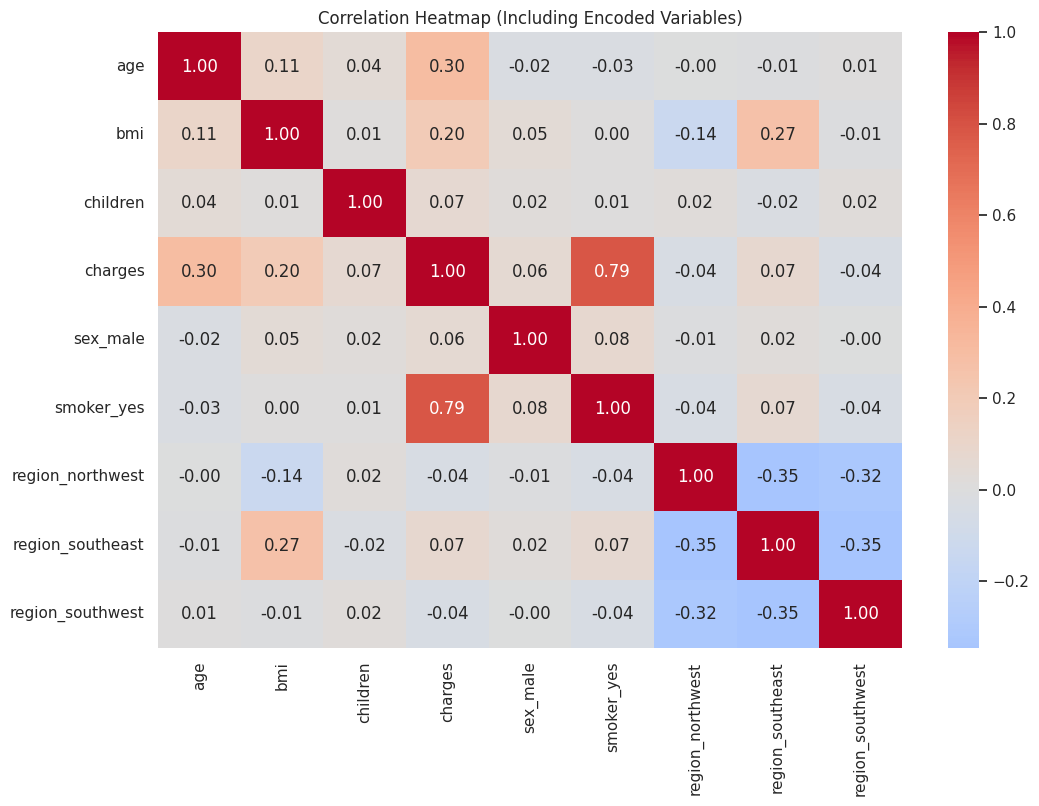


=== Model Performance ===
Validation R²: 0.7753
Validation RMSE: 6101.88
Test R²: 0.7726
Test RMSE: 5772.84


/tmp/ipython-input-3152638329.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.values, y=gender_counts.index, palette="viridis", orient='h')


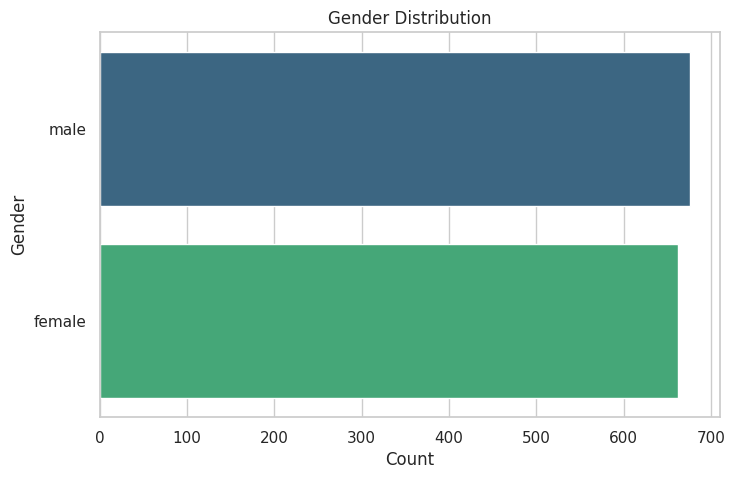

/tmp/ipython-input-3152638329.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smoker_counts.values, y=smoker_counts.index, palette="magma", orient='h')


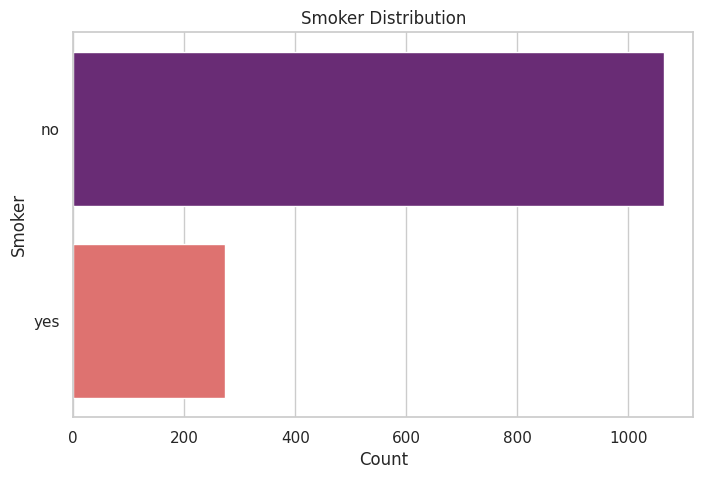

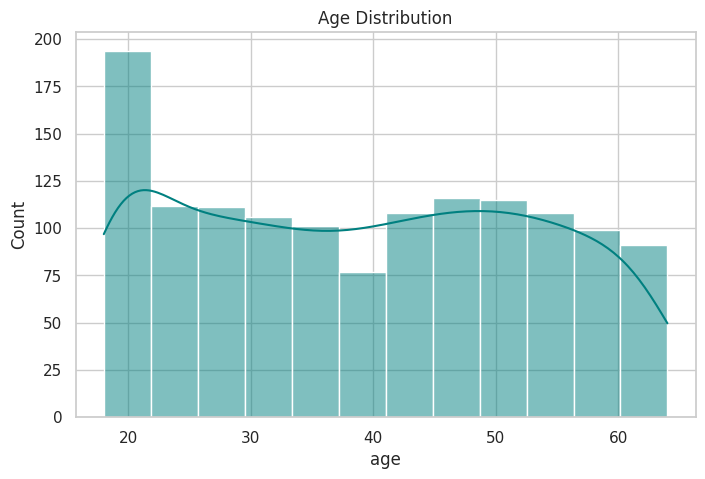

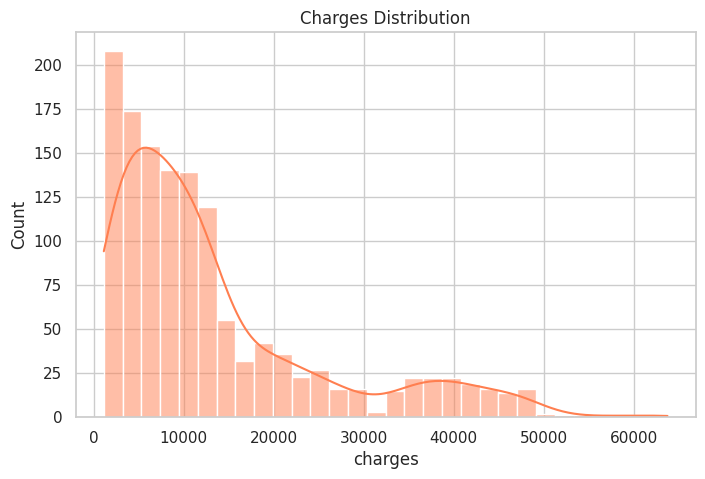

/tmp/ipython-input-3152638329.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='charges', data=df, palette="coolwarm")


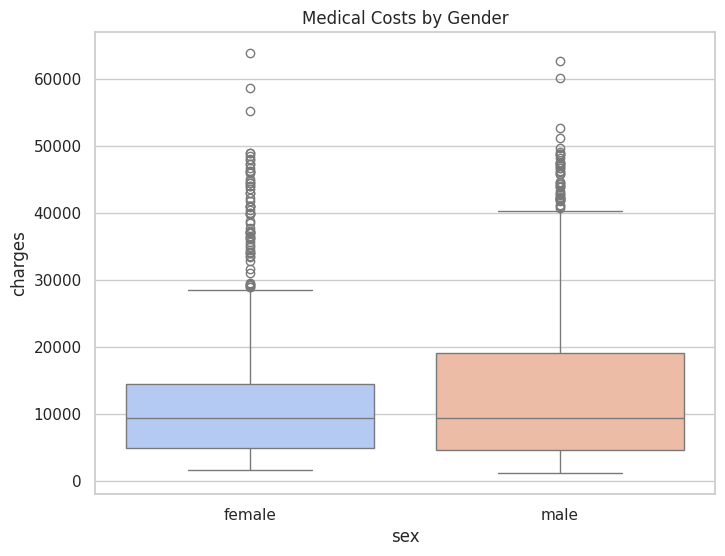

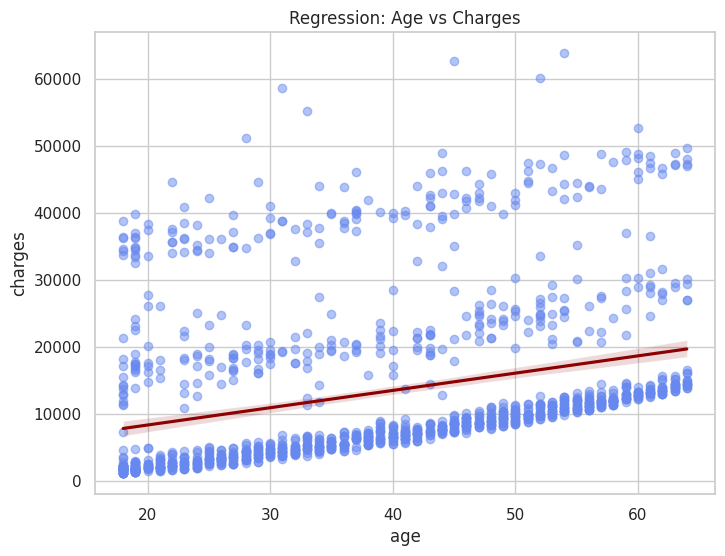

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="coolwarm")

# 1. Load dataset
df = pd.read_csv('insurance.csv')

# 2. Descriptive Statistics
print("\n=== Overall Summary Statistics ===")
print(df.describe(include='all'))

# 3. Grouped summary: Average charges by smoker and gender
print("\n=== Average Charges by Smoker Status ===")
print(df.groupby('smoker')['charges'].mean().round(2))

print("\n=== Average Charges by Gender ===")
print(df.groupby('sex')['charges'].mean().round(2))

print("\n=== Average Charges by Region ===")
print(df.groupby('region')['charges'].mean().round(2))

# 4. Correlation Table including encoded categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)  # Encode first for correlation
corr_table = df_encoded.corr()  # Includes smoker, gender, region
print("\n=== Correlation Table ===")
print(corr_table['charges'].sort_values(ascending=False).round(2))  # Show top correlations with charges

# 5. Print top correlations with 'charges'
print("\n=== Top Correlations with charges ===")
print(corr_table['charges'].sort_values(ascending=False).round(2))

# 6. Correlation Heatmap with annotations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_table, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Including Encoded Variables)")
plt.show()

# 7. Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# 8. Features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# 9. Split: 50/25/25
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 10. Train Linear Regression Model
Mmasibotsana = LinearRegression()
Mmasibotsana.fit(X_train, y_train)

# 11. Predictions
y_val_pred = Mmasibotsana.predict(X_val)
y_test_pred = Mmasibotsana.predict(X_test)

# 12. Evaluation
print("\n=== Model Performance ===")
print("Validation R²:", round(r2_score(y_val, y_val_pred), 4))
print("Validation RMSE:", round(np.sqrt(mean_squared_error(y_val, y_val_pred)), 2))
print("Test R²:", round(r2_score(y_test, y_test_pred), 4))
print("Test RMSE:", round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 2))

# 13. Visualizations

# 13a. Sideways bar chart for Gender
gender_counts = df['sex'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_counts.values, y=gender_counts.index, palette="viridis", orient='h')
plt.title('Gender Distribution')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

# 13b. Sideways bar chart for Smoker
smoker_counts = df['smoker'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=smoker_counts.values, y=smoker_counts.index, palette="magma", orient='h')
plt.title('Smoker Distribution')
plt.xlabel('Count')
plt.ylabel('Smoker')
plt.show()

# 13c. Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, color='teal')
plt.title('Age Distribution')
plt.show()

# 13d. Charges Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['charges'], kde=True, color='coral')
plt.title('Charges Distribution')
plt.show()

# 13e. Boxplot for medical cost by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=df, palette="coolwarm")
plt.title('Medical Costs by Gender')
plt.show()

# 13f. Regression Line: Age vs Charges
plt.figure(figsize=(8, 6))
sns.regplot(x='age', y='charges', data=df, scatter_kws={"alpha":0.5}, line_kws={"color":"darkred"})
plt.title('Regression: Age vs Charges')
plt.show()
